Ce notebook est __à compléter chez vous en avance__ sous sa forme notebook (Téléchargement grâce au bouton en haut). Vous modifierez les listes des données expérimentales en TP.

# (Travail) Application au tracé graphique

## Analyse de la relation durée-distance

### Votre travail
Vous aller devoir exploiter non plus une mesure de temps de vol pour une distance émetteur-récepteur mais regrouper l'ensemble de résultats de mesure
des groupes de TP pour affiner votre mesure de la célérité.

Pour pouvoir tester votre code chez vous en avance, des données expérimentales __fictives__ sont entrées dans la cellule suivante.
En TP, vous récupérerez l'ensemble des données de mesure des différents binômes et modifierez ces listes. Il suffira ensuite d'éxecutez toutes les cellules
suivantes avec le programme que vous aurez écrit.

In [1]:
import numpy as np  # Pensez à l'alias de la bibliothèques numpy pour la suite.
"""Données expérimentales

Pensez à entre les 4 listes dans le même ordre.
"""
d = np.array([10, 20, 30, 40, 50, 60, 70, 80])  # Liste des distances E-R (en cm - évitez les nombres trop petits)
ud = np.array([0.15, 0.26, 0.16, 0.26, 0.14, 0.12, 0.41, 0.32])  # Liste des incertitudes sur d
dt = np.array([30, 60, 90, 120, 150, 180, 210, 240])  # Liste des temps de vol (en ms)
udt = np.array([5.4, 5.8, 4.6, 6.3, 8.3, 10, 5.1, 3.2])  # Liste des incertitudes sur Delta t

La syntaxe et les fonctions de la cellule ci-dessous ne sont pas à connaître. Vous verrez simplement une façon
d'afficher de manière esthétique le tableau des mesures.
Observez surtout le choix des arrondis dans les commentaires (il y a un problème pour le 10 de udt).

In [2]:
import pandas as pd

donnees = pd.DataFrame(
    {
        "d(cm)": ["{:.2f}".format(val) for val in d],  # On arrondi à 10^(-2) pour avoir la même précision que pour l'incertitude
        "u(d)(cm)": ["{:.2f}".format(val) for val in ud],  #On garde deux chiffres significatifs sur l'incertitude
        "Delta t(ms)": ["{:.1f}".format(val) for val in dt],  # Même principe
        "u(Delta t)(ms)": ["{:.1f}".format(val) for val in udt]  # Même principe, il y a juste un problème pour 10
    }
)

donnees.style

,d(cm),u(d)(cm),Delta t(ms),u(Delta t)(ms)
0,10.00,0.15,30.0,5.4
1,20.00,0.26,60.0,5.8
2,30.00,0.16,90.0,4.6
3,40.00,0.26,120.0,6.3
4,50.00,0.14,150.0,8.3
5,60.00,0.12,180.0,10.0
6,70.00,0.41,210.0,5.1
7,80.00,0.32,240.0,3.2


### C'est à vous.

#### Codage
C'est à vous de coder maintenant la cellule suivante est entièrement à votre disposition. Vous devez obtenir en sortie
le graphique représentant $\Delta t$ en fonction $d$.

Pensez bien :
* aux bibliothèques utiles
* aux légendes du graphiques
* aux barres d'incertitudes

_On rappelle que les vecteurs contenant les données ont déjà été créé dans la première cellule._

In [3]:
"""Votre code

A vous de coder le graphique à tracer.
"""

'Votre code\n\nA vous de coder le graphique à tracer.\n'

#### Première analyse des données.
Lorsque vous aurez obtenu le graphique des données expérimentales réelles, analysez le :

* Que cherche-t-on à observer ?
* Observe-t-on ce qu'on attend ?
* Si oui, tant mieux, sinon essayez de comprendre où sont les problèmes.

Ecrire alors le compte-rendu de votre analyse.

## (Travail) Détermination des valeurs de la célérité

### Travail à faire
Cette partie va nous amener à estimer la célérité pour chaque couple de mesure. On réalisera ensuite la moyenne des mesures.

Dans cette partie, le script :
1. réalise pour chaque jeu de données une simulation de Monte-Carlo pour estimer la célérité et son incertitude.
    * On simule N = 100000 fois pour chaque jeu de données. Une explication (à comprendre et retenir) sur la méthode est donnée dans le script.
    * Nous sommes dans le cas où on ne connaît pas la distribution associées aux données de vos camarades. On supposera que les distributions pour $\Delta t$ et $d$ sont __gaussiennes__.
2. (vous) estime la célérité par une moyenne de tous les résultats et l'incertitude avec la formule pour une estimation de type A.
	  * On utilise une moyenne arithmétique pour calculer $c_{mes}$ et son incertitude
	  * L'estimation de l'incertitude est alors (k est le nombre de mesure de c obtenues):

$$ u(C) = \frac{\sigma(echantillons)}{\sqrt{N}}$$

où $\sigma(echantillons)$ est l'écart-type du vecteur échantillons.

3. Représenter sur un graphique chaque valeur de c pour chaque jeu de données avec une barre d'incertitude et la moyenne calculée.
	  * Mettre le numéro des binômes en abscisses (pas d'incertitude là dessus !)
    * Représentez la moyenne par une droite donc par deux points $[0, c_{mes}], [k+1, {c_mes}]$. A vous de voir comment l'implémenter.
    * (Facultatif : Pour aller plus loin) Ajoutez deux droites à $c_{mes} - u(c)$ et $c_{mes} + u(c)$ en pointillés
4. Représenter sur un autre graphique les écarts normalisés à la moyenne des mesures pour vérifier la cohérence des mesures entre elles.

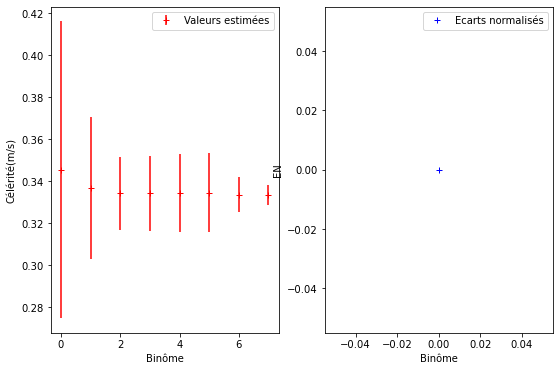

0


In [4]:
"""A vous de coder. On importe pour vous la bibliothèque random 
et la bibliothèque matplotlib.pyplot
"""
import numpy.random as rd
import matplotlib.pyplot as plt

"""
On vous montre comment créer un tableau de taille N*k
où chaque colonne simule les tirages d_i du groupe i suivant une distribution choisie.
Il suffit pour cela d'entrer un vecteur de valeurs pour la moyenne et l'incertitude
au lieu de rentrer une valeur seule.
"""
N = 100000
k = len(d)  # Pour obtenir le nombre de mesures réaliser : la taille de la liste d.
d_sim = rd.normal(d, ud, (N, k))  # Il faut préciser la taille du tableau N lignes et k colonnes
dt_sim = rd.normal(dt, udt, (N, k))

"""
Calcul des c et de pour chaque binomes : moyenne de chaque colonne.
La fonction np.mean possède une option np.mean(..., axis=0) qui permet justement de faire des moyennes que par colonnes.
Note : np.mean(..., axis=1) fait des moyennes par lignes.

Même principe pour l'écart-type avec l'utilisation de l'option axis=0
"""
c_binomes = d_sim / dt_sim  # Calcul de c pour chaque échantillons et chaque binomes de TP.
c_sim = np.mean(c_binomes, axis = 0)  # Moyenne par colonne : on a la célérité de chaque binôme.
uc_sim = np.std(c_binomes, ddof=1, axis=0)  # Ecart-type par colonne :on a l'incertitude de chaque binôme.

"""
C'est à vous maintenant de :
- calculer la moyenne des célérités de chaque binomes
- calculer l'incertitude-type sur la célérité au moyen de la formule donnée dans l'énoncé.
N'hésitez pas à afficher les variables c_sim et uc_sim pour voir leur contenu.
"""
c0 = 0  # A modifier
uc0 = 0  # A modifier

"Calcul des écarts normalisés à la moyenne pour chaque binomes"
en_binomes = 0  # A modifier



"""Tracé graphique
On montre comment tracer les valeurs de célérité avec leurs incertitude et les écarts normalisés dans la même fenêtre.

Seule nouveauté, le tracé de la valeur moyenne. Voici l'instruction à placer (ax représente les axes):
ax.plot([0, k+1], [c_mes, c_mes], color='red', label="Moyenne des mesures")
où c_mes est la variable contenant la valeur de la célérité estimée par moyenne.

Modifier les lignes quand c'est nécessaire.
"""
f, ax = plt.subplots(1, 2, figsize=(9, 6))  # Fenêtre graphique avec deux zones de tracé.
f.suptitle('')  # Donner un titre au graphique

"""Tracé des valeurs de célérité avec incertitude pour chaque groupe"""
ax[0].set_xlabel('Binôme')
ax[0].set_ylabel('Célérité(m/s)')

ax[0].errorbar(np.arange(k), c_sim, yerr=uc_sim, label="Valeurs estimées", marker='+', linestyle='', color='red')
ax[0].legend()

"""Tracé des écarts normalisés"""

"""Pensez à afficher la légende"""
ax[1].set_xlabel('Binôme')
ax[1].set_ylabel('EN')

ax[1].plot(en_binomes, label="Ecarts normalisés", marker='+', linestyle='', color='blue')
ax[1].legend()

plt.show()

"""Calcul de l'écart normalisé entre c0 et la valeur données dans la littérature"""
en_c = 0 # A modifier
print(en_c)


### Analyse des données
Réalisez une analyse des valeurs obtenues pour chaque groupe puis de la célérité moyenne en comparaison avec la valeur donnée dans la littérature.